In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

# EDA

In [2]:
train_df.head()

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Nama,Tiba_Ditujuan
0,0001_01,Jakarta,False,B/0/P,Bali,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Lampung,False,F/0/S,Bali,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Jakarta,False,A/0/S,Bali,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Jakarta,False,A/0/S,Bali,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Lampung,False,F/1/S,Bali,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Memisahkan column penumpang_id
train_df[['grup_id', 'penumpang_id']] = train_df['Penumpang_id'].str.split('_', expand=True)
train_df['grup_id'] = train_df['grup_id'].astype(int)
train_df['penumpang_id'] = train_df['penumpang_id'].astype(int)

# keep null value
def convert_to_int(value):
    try:
        return int(value)
    except (ValueError, TypeError):
        return np.NaN

train_df[['dek', 'nomer_duduk', 'sisi']] = train_df['Kabin'].str.split('/', expand=True)
train_df['nomer_duduk'] = train_df['nomer_duduk'].apply(convert_to_int)

train_df['total_pengeluaran'] = train_df['Servis_Kamar_Tambahan'] + train_df['Belanja_Makanan'] + train_df['Belanja_Merchandise'] + train_df['Spa'] + train_df['Bioskop']


train_df['Sleeper_Plus'] = train_df['Sleeper_Plus'].apply(convert_to_int)
train_df['VIP'] = train_df['VIP'].apply(convert_to_int)
train_df['Tiba_Ditujuan'] = train_df['Tiba_Ditujuan'].apply(convert_to_int)

train_df.head()

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Nama,Tiba_Ditujuan,grup_id,penumpang_id,dek,nomer_duduk,sisi,total_pengeluaran
0,0001_01,Jakarta,0.0,B/0/P,Bali,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,B,0.0,P,0.0
1,0002_01,Lampung,0.0,F/0/S,Bali,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,F,0.0,S,736.0
2,0003_01,Jakarta,0.0,A/0/S,Bali,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,A,0.0,S,10383.0
3,0003_02,Jakarta,0.0,A/0/S,Bali,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,A,0.0,S,5176.0
4,0004_01,Lampung,0.0,F/1/S,Bali,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,F,1.0,S,1091.0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954 entries, 0 to 6953
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Penumpang_id           6954 non-null   object 
 1   Asal                   6793 non-null   object 
 2   Sleeper_Plus           6783 non-null   float64
 3   Kabin                  6792 non-null   object 
 4   Tujuan                 6804 non-null   object 
 5   Umur                   6800 non-null   float64
 6   VIP                    6796 non-null   float64
 7   Servis_Kamar_Tambahan  6804 non-null   float64
 8   Belanja_Makanan        6801 non-null   float64
 9   Belanja_Merchandise    6786 non-null   float64
 10  Spa                    6808 non-null   float64
 11  Bioskop                6792 non-null   float64
 12  Nama                   6789 non-null   object 
 13  Tiba_Ditujuan          6954 non-null   int64  
 14  grup_id                6954 non-null   int64  
 15  penu

In [5]:
train_df.describe()

,Sleeper_Plus,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Tiba_Ditujuan,grup_id,penumpang_id,nomer_duduk,total_pengeluaran
count,6783.000000,6800.000000,6796.000000,6804.000000,6801.000000,6786.000000,6808.000000,6792.000000,6954.000000,6954.000000,6954.000000,6792.000000,6203.000000
mean,0.356479,28.883676,0.021483,225.257055,458.740038,174.220749,312.969741,302.348793,0.510498,3702.777538,1.517400,477.584069,1493.385136
std,0.478994,14.570737,0.144999,662.105367,1634.970406,550.497694,1152.953321,1139.927062,0.499926,2125.139270,1.048129,406.404257,2853.118476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1850.750000,1.000000,133.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3741.500000,1.000000,334.500000,744.000000
75%,1.000000,38.000000,0.000000,48.000000,76.000000,27.000000,58.000000,44.000000,1.000000,5561.000000,2.000000,805.250000,1506.500000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,12253.000000,22408.000000,24133.000000,1.000000,7387.000000,8.000000,1527.000000,35987.000000


In [6]:
train_df.isnull().sum()

Penumpang_id               0
Asal                     161
Sleeper_Plus             171
Kabin                    162
Tujuan                   150
Umur                     154
VIP                      158
Servis_Kamar_Tambahan    150
Belanja_Makanan          153
Belanja_Merchandise      168
Spa                      146
Bioskop                  162
Nama                     165
Tiba_Ditujuan              0
grup_id                    0
penumpang_id               0
dek                      162
nomer_duduk              162
sisi                     162
total_pengeluaran        751
dtype: int64

In [7]:
train_df.describe(include=['O'])

,Penumpang_id,Asal,Kabin,Tujuan,Nama,dek,sisi
count,6954,6793,6792,6804,6789,6792,6792
unique,6954,3,5244,3,6777,8,2
top,7387_01,Lampung,G/734/S,Bali,Gollux Reedall,F,S
freq,1,3668,8,4747,2,2229,3417


/tmp/ipykernel_3358/1667580060.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True)


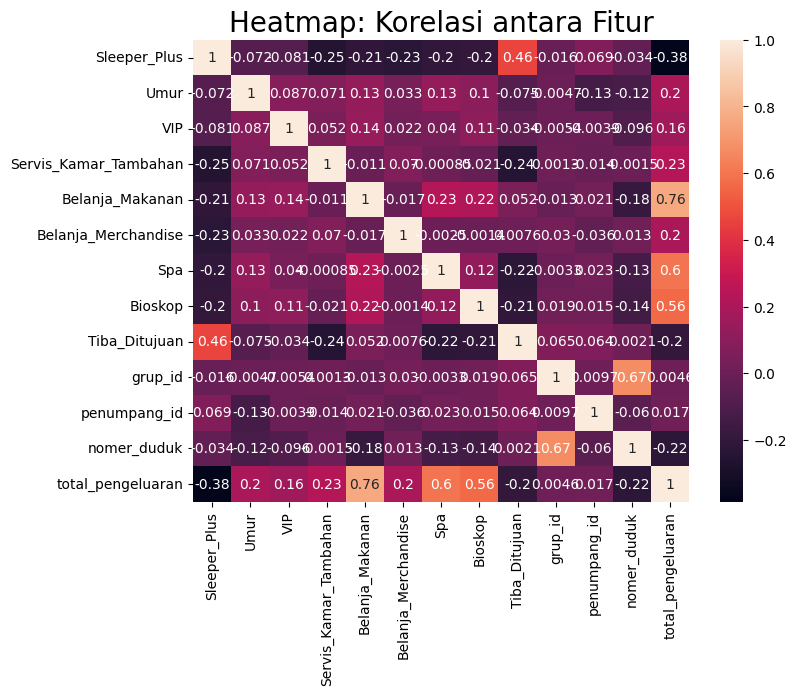

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(train_df.corr(), annot=True)
plt.title('Heatmap: Korelasi antara Fitur', fontsize=20)
plt.show()

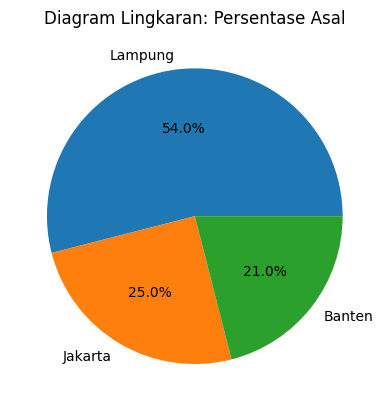

In [9]:
counts_asal = train_df['Asal'].value_counts()
plt.pie(counts_asal.values, labels=counts_asal.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase Asal')
plt.show()

In [10]:
train_df[['Asal', 'Tiba_Ditujuan']].groupby(['Asal'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,Asal,Tiba_Ditujuan
1,Jakarta,0.658422
0,Banten,0.519972
2,Lampung,0.436750


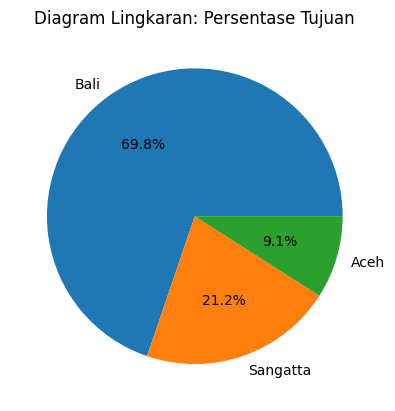

In [11]:
counts_tujuan = train_df['Tujuan'].value_counts()
plt.pie(counts_tujuan.values, labels=counts_tujuan.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase Tujuan')
plt.show()

In [12]:
train_df[['Tujuan', 'Tiba_Ditujuan']].groupby(['Tujuan'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,Tujuan,Tiba_Ditujuan
2,Sangatta,0.612075
0,Aceh,0.514610
1,Bali,0.478618


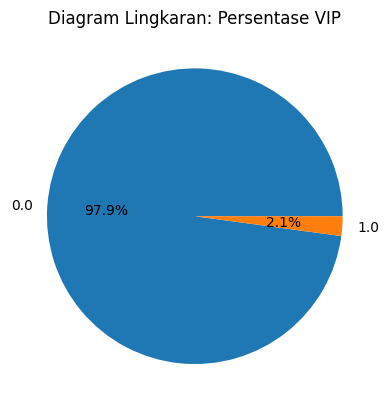

In [13]:
counts_vip = train_df['VIP'].value_counts()
plt.pie(counts_vip.values, labels=counts_vip.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase VIP')
plt.show()

In [14]:
train_df[['VIP', 'Tiba_Ditujuan']].groupby(['VIP'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,VIP,Tiba_Ditujuan
0,0.0,0.512782
1,1.0,0.397260


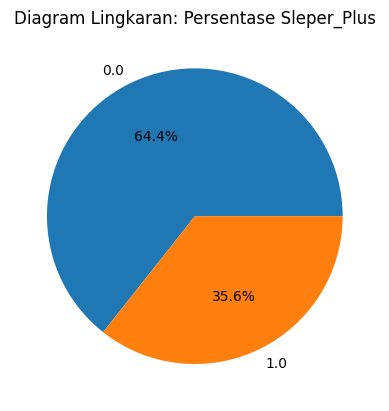

In [15]:
counts_tujuan = train_df['Sleeper_Plus'].value_counts()
plt.pie(counts_tujuan.values, labels=counts_tujuan.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase Sleper_Plus')
plt.show()

In [16]:
train_df[['Sleeper_Plus', 'Tiba_Ditujuan']].groupby(['Sleeper_Plus'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,Sleeper_Plus,Tiba_Ditujuan
1,1.0,0.820513
0,0.0,0.338373


In [17]:
train_df[['penumpang_id', 'Tiba_Ditujuan']].groupby(['penumpang_id'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,penumpang_id,Tiba_Ditujuan
2,3,0.630435
3,4,0.604278
4,5,0.592233
1,2,0.558016
5,6,0.508197
6,7,0.486486
0,1,0.483903
7,8,0.285714


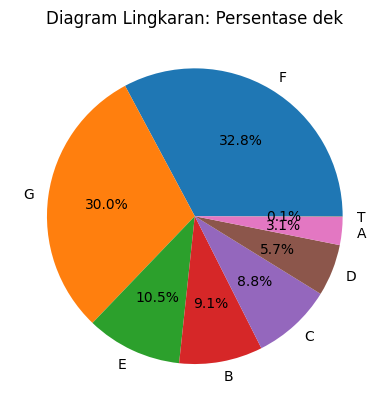

In [18]:
counts_tujuan = train_df['dek'].value_counts()
plt.pie(counts_tujuan.values, labels=counts_tujuan.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase dek')
plt.show()

In [19]:
train_df[['dek', 'Tiba_Ditujuan']].groupby(['dek'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,dek,Tiba_Ditujuan
1,B,0.722581
2,C,0.690756
6,G,0.536047
0,A,0.490385
5,F,0.446837
3,D,0.436364
4,E,0.351617
7,T,0.200000


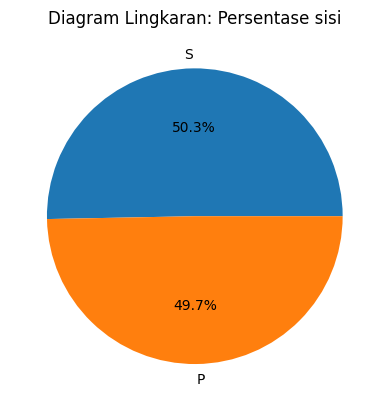

In [20]:
counts_tujuan = train_df['sisi'].value_counts()
plt.pie(counts_tujuan.values, labels=counts_tujuan.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase sisi')
plt.show()

In [21]:
train_df[['sisi', 'Tiba_Ditujuan']].groupby(['sisi'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,sisi,Tiba_Ditujuan
1,S,0.567749
0,P,0.453037


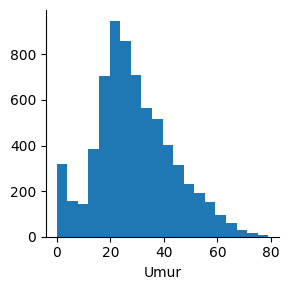

In [22]:
g = sns.FacetGrid(train_df)
g.map(plt.hist, 'Umur', bins=20)

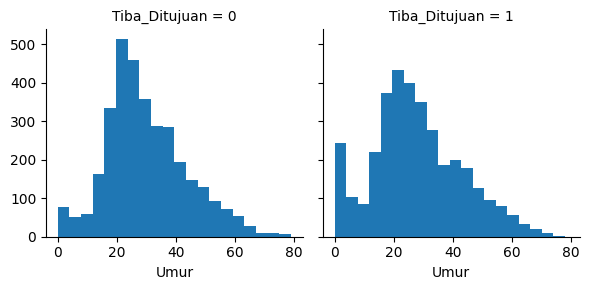

In [23]:
g = sns.FacetGrid(train_df, col='Tiba_Ditujuan')
g.map(plt.hist, 'Umur', bins=20)

### Soal 1
- Penumpang terbanyak dilihat jika penumpang terbanyak terdapat pada rentang umur 20-24
- Dapat dilihat jika terdapat perbandingan signifikan pada umur 0-4. Kelompok umur tersebut cenderung tiba ditujuan

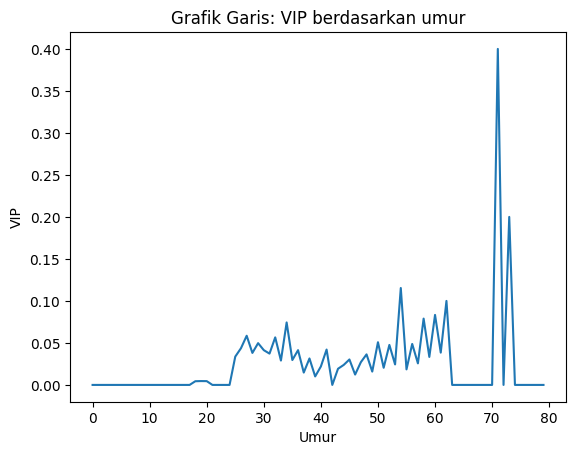

In [24]:
dataframe_birth_vip = train_df.groupby('Umur')['VIP'].mean()
plt.plot(dataframe_birth_vip.index, dataframe_birth_vip.values)
plt.title('Grafik Garis: VIP berdasarkan umur')
plt.xlabel('Umur')
plt.ylabel('VIP')
plt.show()

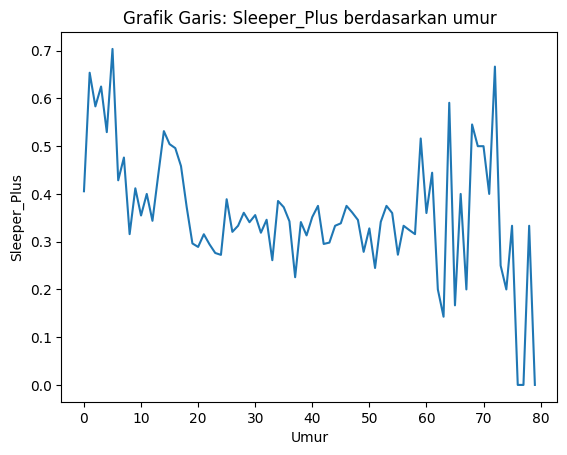

In [25]:
dataframe_birth_sleeperplus = train_df.groupby('Umur')['Sleeper_Plus'].mean()
plt.plot(dataframe_birth_sleeperplus.index, dataframe_birth_sleeperplus.values)
plt.title('Grafik Garis: Sleeper_Plus berdasarkan umur')
plt.xlabel('Umur')
plt.ylabel('Sleeper_Plus')
plt.show()

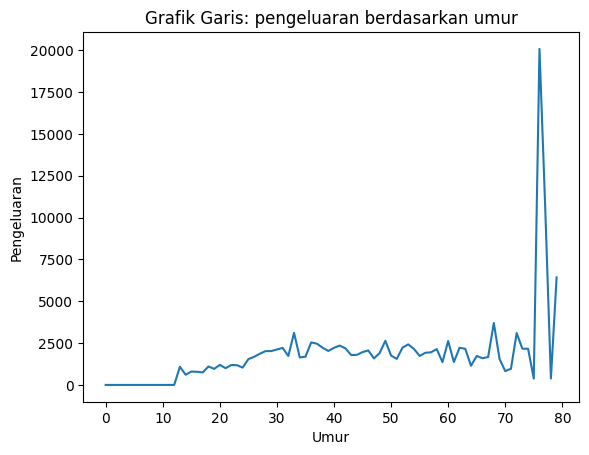

In [26]:
dataframe_birth_pengeluaran= train_df.groupby('Umur')['total_pengeluaran'].mean()
plt.plot(dataframe_birth_pengeluaran.index, dataframe_birth_pengeluaran.values)
plt.title('Grafik Garis: pengeluaran berdasarkan umur')
plt.xlabel('Umur')
plt.ylabel('Pengeluaran')
plt.show()

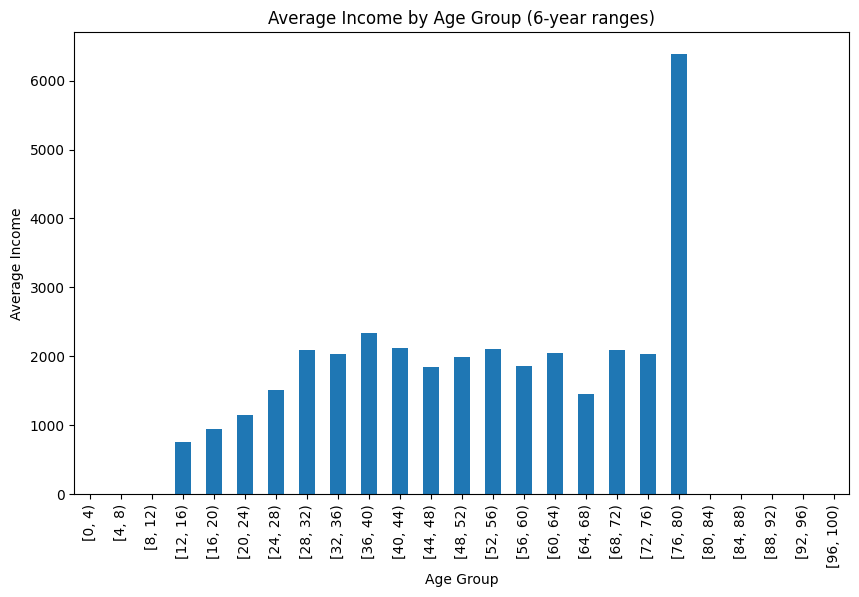

In [27]:
train_df['range_umur'] = pd.cut(train_df['Umur'], bins=range(0, 101, 4), right=False)

average_income_by_age_group = train_df.groupby('range_umur')['total_pengeluaran'].mean()

plt.figure(figsize=(10, 6))
average_income_by_age_group.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.title('Average Income by Age Group (6-year ranges)')
plt.show()

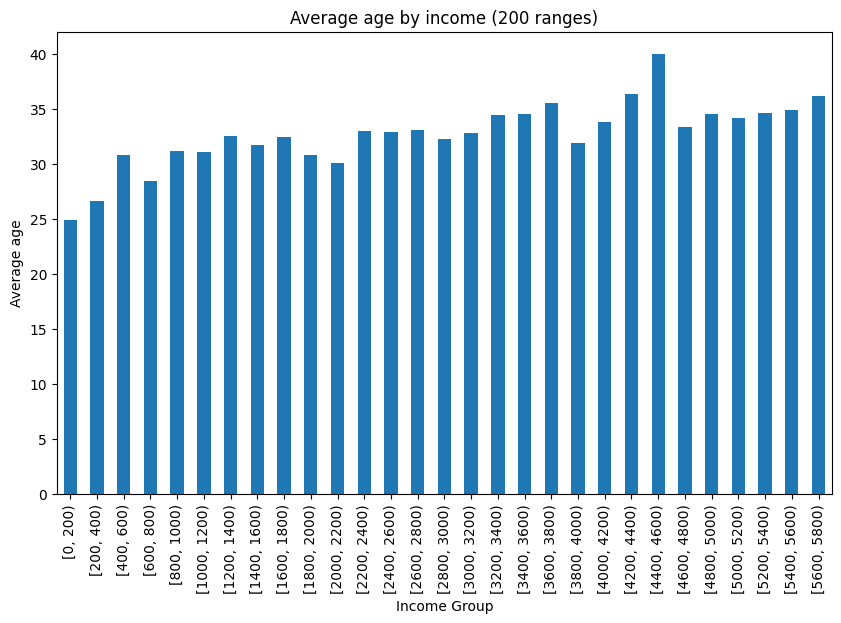

In [28]:
train_df['range_pengeluaran'] = pd.cut(train_df['total_pengeluaran'], bins=range(0, 6000, 200), right=False)

average_age_by_income = train_df.groupby('range_pengeluaran')['Umur'].mean()

plt.figure(figsize=(10, 6))
average_age_by_income.plot(kind='bar')
plt.xlabel('Income Group')
plt.ylabel('Average age')
plt.title('Average age by income (200 ranges)')
plt.show()

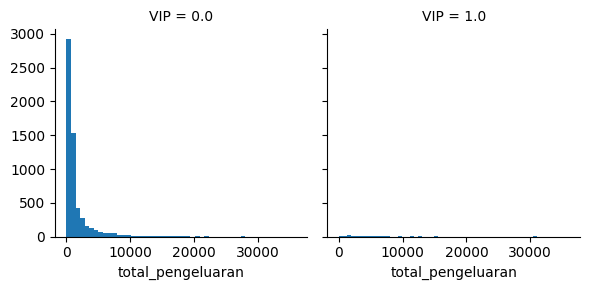

In [29]:
g = sns.FacetGrid(train_df, col='VIP')
g.map(plt.hist, 'total_pengeluaran', bins=50)

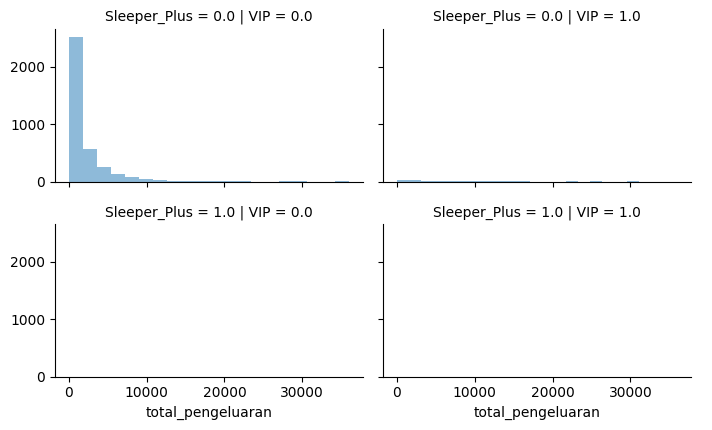

In [30]:
grid = sns.FacetGrid(train_df, col='VIP', row='Sleeper_Plus', height=2.2, aspect=1.6)
grid.map(plt.hist, 'total_pengeluaran', alpha=.5, bins=20)
grid.add_legend();

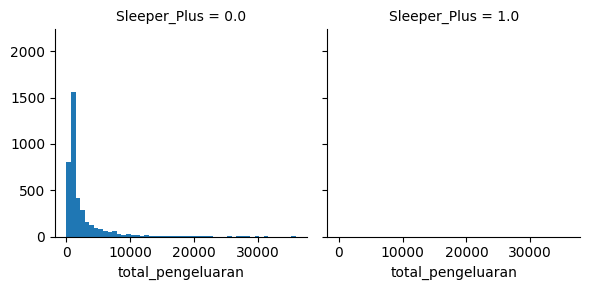

In [31]:
g = sns.FacetGrid(train_df, col='Sleeper_Plus')
g.map(plt.hist, 'total_pengeluaran', bins=50)

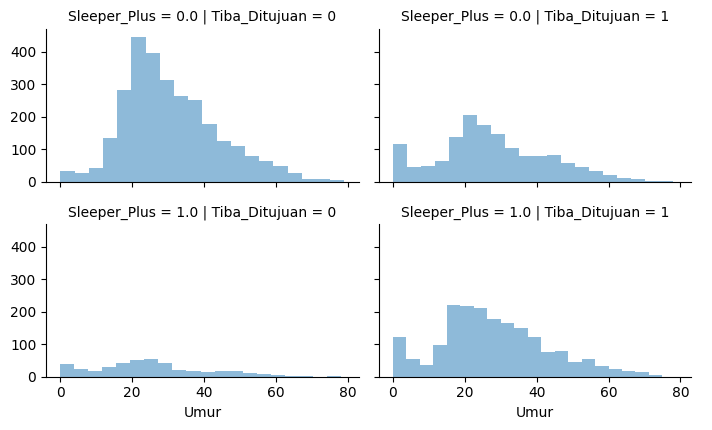

In [32]:
grid = sns.FacetGrid(train_df, col='Tiba_Ditujuan', row='Sleeper_Plus', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Umur', alpha=.5, bins=20)
grid.add_legend();

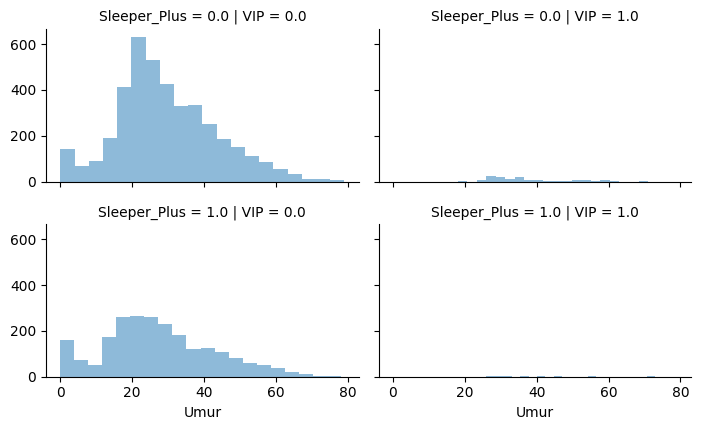

In [33]:
grid = sns.FacetGrid(train_df, col='VIP', row='Sleeper_Plus', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Umur', alpha=.5, bins=20)
grid.add_legend();

/home/reynoldputra/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


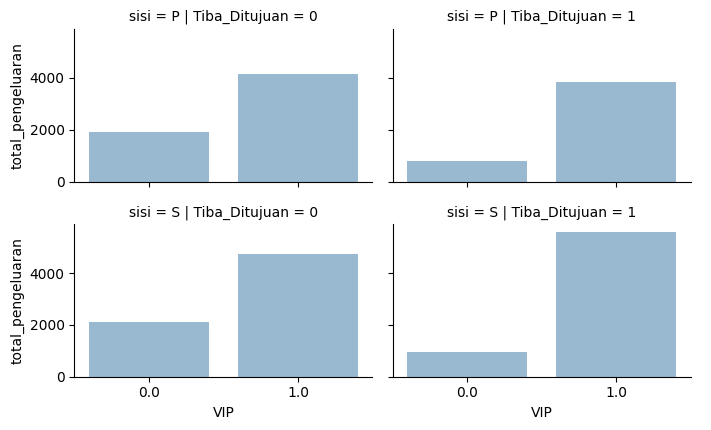

In [34]:
grid = sns.FacetGrid(train_df, row='sisi', col='Tiba_Ditujuan', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'VIP', 'total_pengeluaran', alpha=.5, errorbar=None)
grid.add_legend()

/home/reynoldputra/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


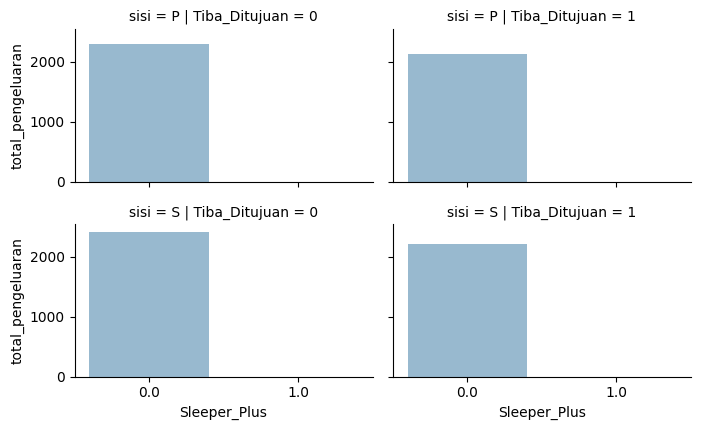

In [35]:
grid = sns.FacetGrid(train_df, row='sisi', col='Tiba_Ditujuan', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sleeper_Plus', 'total_pengeluaran', alpha=.5, errorbar=None)
grid.add_legend()

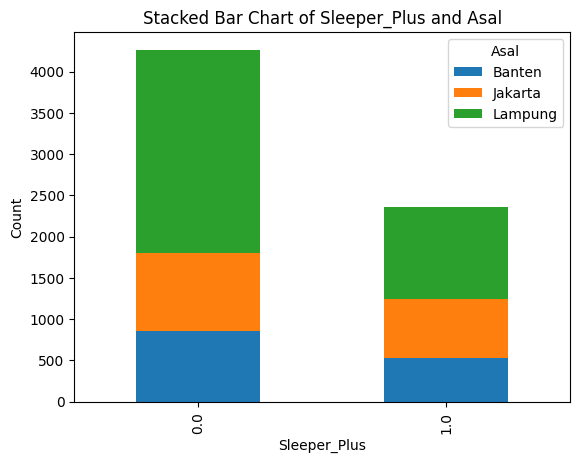

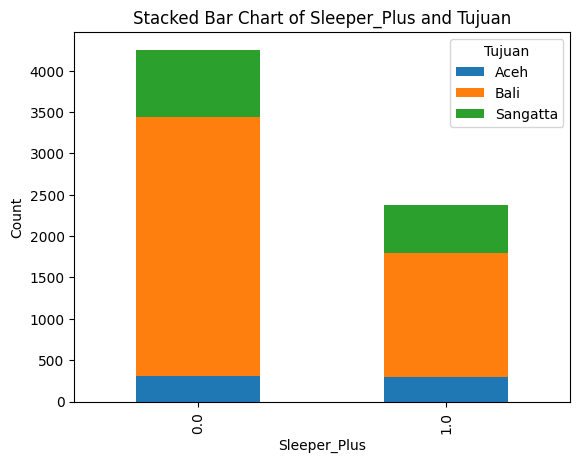

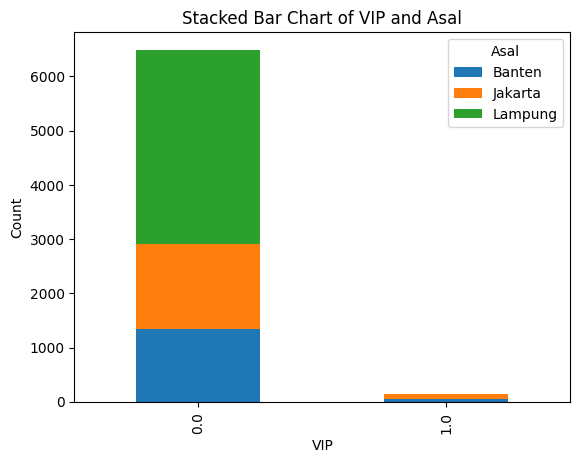

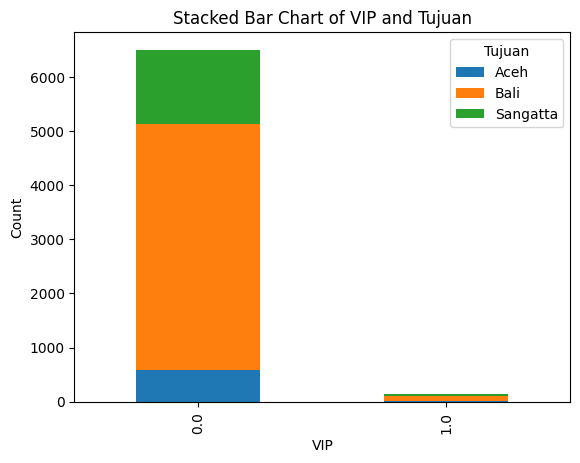

In [36]:
counts = train_df.groupby(['Sleeper_Plus', 'Asal']).size().unstack()
counts.plot(kind='bar', stacked=True)
plt.xlabel('Sleeper_Plus')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Sleeper_Plus and Asal')
plt.show()

counts = train_df.groupby(['Sleeper_Plus', 'Tujuan']).size().unstack()
counts.plot(kind='bar', stacked=True)
plt.xlabel('Sleeper_Plus')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Sleeper_Plus and Tujuan')
plt.show()

counts = train_df.groupby(['VIP', 'Asal']).size().unstack()
counts.plot(kind='bar', stacked=True)
plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of VIP and Asal')
plt.show()

counts = train_df.groupby(['VIP', 'Tujuan']).size().unstack()
counts.plot(kind='bar', stacked=True)
plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of VIP and Tujuan')
plt.show()


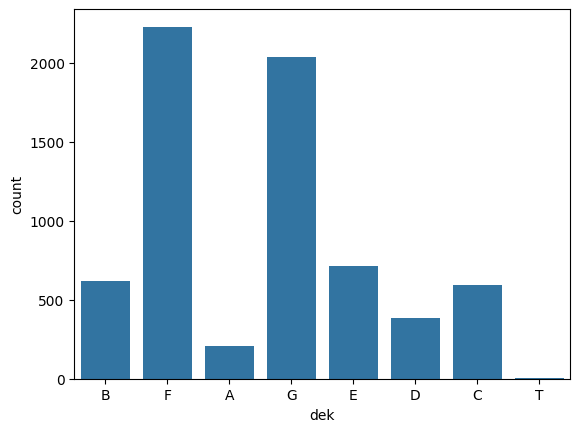

In [37]:
sns.countplot(x='dek', data=train_df, )
plt.show()

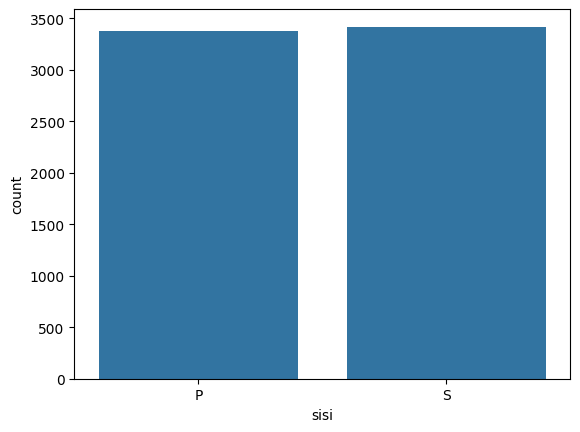

In [38]:
sns.countplot(x='sisi', data=train_df)
plt.show()

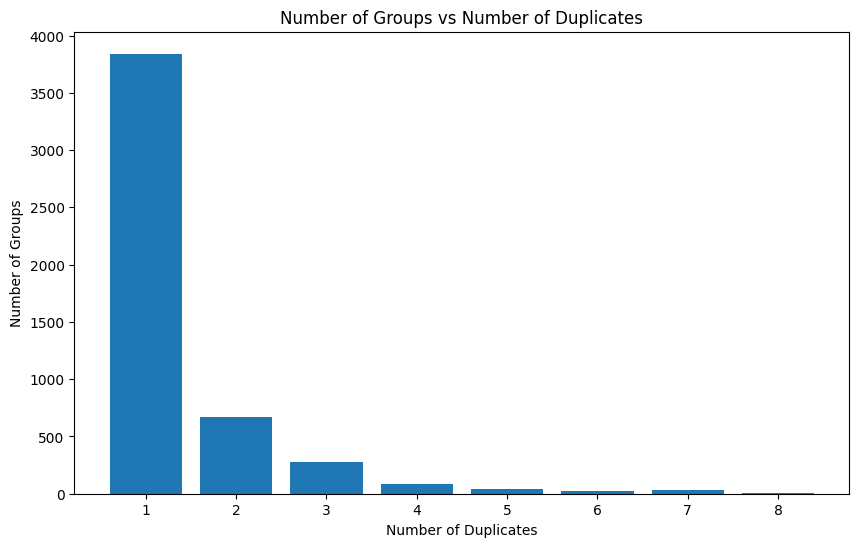

In [39]:
duplicates_count = train_df['grup_id'].value_counts()
count_of_counts = duplicates_count.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(count_of_counts.index, count_of_counts.values)
plt.xlabel('Number of Duplicates')
plt.ylabel('Number of Groups')
plt.title('Number of Groups vs Number of Duplicates')
plt.show()

# Processing

## Asal

In [40]:
# setiap orang dalam satu grup memiliki data asal yang sama
no_null_asal = train_df.dropna(subset=['Asal'])
grouped = no_null_asal.groupby('grup_id')['Asal'].nunique()
(grouped == 1).all()


True

In [41]:
# mengisi "Asal" dengan value yang sama dengan group_idnya
train_df = train_df.sort_values(by=['grup_id', 'Asal'])
train_df['Asal'] = train_df.groupby('grup_id')['Asal'].ffill()
train_df['Asal'].fillna(train_df['Asal'].mode()[0], inplace=True)
train_df.reset_index(drop=True, inplace=True)
train_df.isnull().sum()

Penumpang_id                0
Asal                        0
Sleeper_Plus              171
Kabin                     162
Tujuan                    150
Umur                      154
VIP                       158
Servis_Kamar_Tambahan     150
Belanja_Makanan           153
Belanja_Merchandise       168
Spa                       146
Bioskop                   162
Nama                      165
Tiba_Ditujuan               0
grup_id                     0
penumpang_id                0
dek                       162
nomer_duduk               162
sisi                      162
total_pengeluaran         751
range_umur                154
range_pengeluaran        1138
dtype: int64

# Tujuan

In [42]:
# setiap orang dalam satu grup memiliki data tujuan yang sama
no_null_asal = train_df.dropna(subset=['Tujuan'])
grouped = no_null_asal.groupby('grup_id')['Tujuan'].nunique()
(grouped == 1).all()

False

In [43]:
# isi tujuan dengan value terbanyak, karna Bali memiliki persentase yang cukup tinggi
train_df['Tujuan'].fillna(train_df['Tujuan'].mode()[0], inplace=True)
train_df.reset_index(drop=True, inplace=True)
train_df.isnull().sum()

Penumpang_id                0
Asal                        0
Sleeper_Plus              171
Kabin                     162
Tujuan                      0
Umur                      154
VIP                       158
Servis_Kamar_Tambahan     150
Belanja_Makanan           153
Belanja_Merchandise       168
Spa                       146
Bioskop                   162
Nama                      165
Tiba_Ditujuan               0
grup_id                     0
penumpang_id                0
dek                       162
nomer_duduk               162
sisi                      162
total_pengeluaran         751
range_umur                154
range_pengeluaran        1138
dtype: int64

In [44]:
selected_data = train_df[(train_df['VIP'].isna()) & (train_df['Umur'] > 70)]
selected_data

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,...,Nama,Tiba_Ditujuan,grup_id,penumpang_id,dek,nomer_duduk,sisi,total_pengeluaran,range_umur,range_pengeluaran


In [45]:
train_df['VIP'].fillna(0, inplace=True)
train_df.isnull().sum()

Penumpang_id                0
Asal                        0
Sleeper_Plus              171
Kabin                     162
Tujuan                      0
Umur                      154
VIP                         0
Servis_Kamar_Tambahan     150
Belanja_Makanan           153
Belanja_Merchandise       168
Spa                       146
Bioskop                   162
Nama                      165
Tiba_Ditujuan               0
grup_id                     0
penumpang_id                0
dek                       162
nomer_duduk               162
sisi                      162
total_pengeluaran         751
range_umur                154
range_pengeluaran        1138
dtype: int64

In [46]:
train_df['Servis_Kamar_Tambahan'].fillna(train_df['Servis_Kamar_Tambahan'].mean(), inplace=True)
train_df['Belanja_Makanan'].fillna(train_df['Belanja_Makanan'].mean(), inplace=True)
train_df['Belanja_Merchandise'].fillna(train_df['Belanja_Merchandise'].mean(), inplace=True)
train_df['Spa'].fillna(train_df['Spa'].mean(), inplace=True)
train_df['Bioskop'].fillna(train_df['Bioskop'].mean(), inplace=True)

train_df['total_pengeluaran'] = train_df['Servis_Kamar_Tambahan'] + train_df['Belanja_Makanan'] + train_df['Belanja_Merchandise'] + train_df['Spa'] + train_df['Bioskop']

train_df.isnull().sum()

Penumpang_id                0
Asal                        0
Sleeper_Plus              171
Kabin                     162
Tujuan                      0
Umur                      154
VIP                         0
Servis_Kamar_Tambahan       0
Belanja_Makanan             0
Belanja_Merchandise         0
Spa                         0
Bioskop                     0
Nama                      165
Tiba_Ditujuan               0
grup_id                     0
penumpang_id                0
dek                       162
nomer_duduk               162
sisi                      162
total_pengeluaran           0
range_umur                154
range_pengeluaran        1138
dtype: int64

In [47]:
train_df['range_pengeluaran'] = pd.cut(train_df['total_pengeluaran'], bins=range(0, 6000, 200), right=False)
average_age_by_income = train_df.groupby('range_pengeluaran')['Umur'].mean().round()

missing_umur_rows = train_df[train_df['Umur'].isna()]

for index, row in missing_umur_rows.iterrows():
    umur = row['Umur']
    if not pd.isna(umur):
        continue

    # get age by income averag 
    avg_umur = average_age_by_income.get(row['range_pengeluaran'], None)
    if avg_umur is not None:
        train_df.loc[index, 'Umur'] = avg_umur

train_df.loc[train_df['total_pengeluaran'] > 6000, 'Umur'] = 75

train_df.dropna(subset=['Umur'], inplace=True)

train_df.isnull().sum()

Penumpang_id               0
Asal                       0
Sleeper_Plus             170
Kabin                    162
Tujuan                     0
Umur                       0
VIP                        0
Servis_Kamar_Tambahan      0
Belanja_Makanan            0
Belanja_Merchandise        0
Spa                        0
Bioskop                    0
Nama                     165
Tiba_Ditujuan              0
grup_id                    0
penumpang_id               0
dek                      162
nomer_duduk              162
sisi                     162
total_pengeluaran          0
range_umur               153
range_pengeluaran        413
dtype: int64

In [52]:
train_df['Sleeper_Plus'].fillna(1, inplace=True)
train_df.dropna(subset=['Kabin', 'dek', 'nomer_duduk', 'sisi', 'range_umur', 'range_pengeluaran'], inplace=True)

train_df.isnull().sum()

KeyError: ['Kabin']

In [49]:
train_df.drop(columns=['Nama', 'Kabin'], inplace=True)



In [50]:
train_df.head()

,Penumpang_id,Asal,Sleeper_Plus,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Tiba_Ditujuan,grup_id,penumpang_id,dek,nomer_duduk,sisi,total_pengeluaran,range_umur,range_pengeluaran
0,0001_01,Jakarta,0.0,Bali,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,B,0.0,P,0.0,"[36, 40)","[0, 200)"
1,0002_01,Lampung,0.0,Bali,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,2,1,F,0.0,S,736.0,"[24, 28)","[600, 800)"
3,0003_02,Jakarta,0.0,Bali,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,3,2,A,0.0,S,5176.0,"[32, 36)","[5000, 5200)"
4,0004_01,Lampung,0.0,Bali,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,4,1,F,1.0,S,1091.0,"[16, 20)","[1000, 1200)"
5,0005_01,Lampung,0.0,Aceh,44.0,0.0,0.0,483.0,0.0,291.0,0.0,1,5,1,F,0.0,P,774.0,"[44, 48)","[600, 800)"


In [ ]:
# for dataset in train_df:
#     dataset['sisi'] = dataset['sisi'].map( {'P': 0, 'S': 1} ).astype(int)

# train_df.head()

In [51]:
one_hot_encoder = OneHotEncoder()
encoded_data_OneHot = one_hot_encoder.fit_transform(train_df[['Asal']]).toarray()
df_encoded = pd.DataFrame(encoded_data_OneHot, columns=one_hot_encoder.get_feature_names_out(['Asal']))
train_df = pd.concat([train_df.reset_index(), df_encoded], axis=1)
train_df.reset_index(drop=True, inplace=True)
train_df.drop(columns=['index', 'Asal'], inplace=True)

train_df.head()

,Penumpang_id,Sleeper_Plus,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,...,penumpang_id,dek,nomer_duduk,sisi,total_pengeluaran,range_umur,range_pengeluaran,Asal_Banten,Asal_Jakarta,Asal_Lampung
0,0001_01,0.0,Bali,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,B,0.0,P,0.0,"[36, 40)","[0, 200)",0.0,1.0,0.0
1,0002_01,0.0,Bali,24.0,0.0,109.0,9.0,25.0,549.0,44.0,...,1,F,0.0,S,736.0,"[24, 28)","[600, 800)",0.0,0.0,1.0
2,0003_02,0.0,Bali,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,...,2,A,0.0,S,5176.0,"[32, 36)","[5000, 5200)",0.0,1.0,0.0
3,0004_01,0.0,Bali,16.0,0.0,303.0,70.0,151.0,565.0,2.0,...,1,F,1.0,S,1091.0,"[16, 20)","[1000, 1200)",0.0,0.0,1.0
4,0005_01,0.0,Aceh,44.0,0.0,0.0,483.0,0.0,291.0,0.0,...,1,F,0.0,P,774.0,"[44, 48)","[600, 800)",0.0,0.0,1.0
